# **Genotype_Phenotype_DNN Project**

## **Importing important Libraries**

In [1]:
%matplotlib inline
%load_ext tensorboard
#!pip install keras-tuner
import pandas as pd
import numpy as np
import tensorflow as tf
for gpu in tf.config.list_physical_devices("GPU"):
    tf.config.experimental.set_memory_growth(gpu, True)
from matplotlib import pyplot as plt
import keras_tuner as kt
from sklearn.metrics import confusion_matrix, accuracy_score

2023-06-23 12:40:47.086661: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 12:40:47.189695: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-23 12:40:47.724719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/rkannan/miniconda3/envs/richard_tf/lib/
2023-06-23 12:40:47.724778: W tensorflow

## **Loading Datasets**

In [2]:
genotypeFile = 'genotype.csv'
genotype = pd.read_csv(genotypeFile, sep = '\t', index_col = 0)
print('genotypeFile shape:', genotype.shape )

phenotypeFile = 'phenotype.csv'
multiPheno = pd.read_csv(phenotypeFile, sep = ',', index_col = 0)
print('Phenotype_Multi shape:', multiPheno.shape )

genotypeFile shape: (4390, 28220)
Phenotype_Multi shape: (4390, 20)


In [3]:
geno_df = pd.DataFrame(genotype)
print("The Columns of the Phenotype Dataset:\n",geno_df.columns,'\n')
print('\nChecking if Any Column has missing Values in the Genotype Dataset:\n{0}\n\n'.format(geno_df.isnull().sum()))
print("The first 10 records of the Genotype Dataset:\n")
geno_df.head(10)

The Columns of the Phenotype Dataset:
 Index(['33070_chrI_33070_A_T', '33147_chrI_33147_G_T', '33152_chrI_33152_T_C',
       '33200_chrI_33200_C_T', '33293_chrI_33293_A_T', '33328_chrI_33328_C_A',
       '33348_chrI_33348_G_C', '33403_chrI_33403_C_T', '33502_chrI_33502_A_G',
       '33548_chrI_33548_A_C',
       ...
       '12048853_chrXVI_925593_G_C', '12049199_chrXVI_925939_T_C',
       '12049441_chrXVI_926181_C_T', '12050613_chrXVI_927353_T_G',
       '12051167_chrXVI_927907_A_C', '12051240_chrXVI_927980_A_G',
       '12051367_chrXVI_928107_C_T', '12052782_chrXVI_929522_C_T',
       '12052988_chrXVI_929728_A_G', '12053130_chrXVI_929870_C_T'],
      dtype='object', length=28220) 


Checking if Any Column has missing Values in the Genotype Dataset:
33070_chrI_33070_A_T          0
33147_chrI_33147_G_T          0
33152_chrI_33152_T_C          0
33200_chrI_33200_C_T          0
33293_chrI_33293_A_T          0
                             ..
12051240_chrXVI_927980_A_G    0
12051367_chrXVI_

,33070_chrI_33070_A_T,33147_chrI_33147_G_T,33152_chrI_33152_T_C,33200_chrI_33200_C_T,33293_chrI_33293_A_T,33328_chrI_33328_C_A,33348_chrI_33348_G_C,33403_chrI_33403_C_T,33502_chrI_33502_A_G,33548_chrI_33548_A_C,...,12048853_chrXVI_925593_G_C,12049199_chrXVI_925939_T_C,12049441_chrXVI_926181_C_T,12050613_chrXVI_927353_T_G,12051167_chrXVI_927907_A_C,12051240_chrXVI_927980_A_G,12051367_chrXVI_928107_C_T,12052782_chrXVI_929522_C_T,12052988_chrXVI_929728_A_G,12053130_chrXVI_929870_C_T
SAMID,,,,,,,,,,,,,,,,,,,,,
01_01,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
01_02,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
01_03,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
01_04,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
01_06,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
01_07,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
01_08,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
01_09,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
01_10,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2


**NB:** laboratory strain (BY) and an isolate from a vineyard (RM). The original data fields in the yeast genotype profiles were encoded as -1 for BY and 1 for RM. The loss function to be used in this proposed model requires non-negative data fields, we replaced all -1 values with 2 when preprocessing the genotype data.

**Hence: 1 = vineyard strain (RM) and 2 = laboratory strain (BY)**

In [4]:
pheno_df = pd.DataFrame(multiPheno)
print("The Columns of the Phenotype Dataset:\n",pheno_df.columns,'\n')
pheno_df_3 = pheno_df[[
    '1_CobaltChloride_1', '1_CopperSulfate_1', '1_Diamide_1',
       '1_E6-Berbamine_1', '1_Ethanol_1', '1_Formamide_1',
       '1_Hydroxyurea_1', '1_IndolaceticAcid_1', '1_Lactate_1',
       '1_Lactose_1', '1_MagnesiumChloride_1', '1_ManganeseSulfate_1',
       '1_Menadione_1', '1_Neomycin_1', '1_Raffinose_1', '1_Trehalose_1',
       '1_Xylose_1', '1_YNB_1', '1_YPD_1', '1_Zeocin_1'
]]
print('\nChecking if Any Column has missing Values in the Phenotype Dataset:\n{0}\n\n'.format(pheno_df_3.isnull().sum()))
print("The first 10 records of the Phenotype Dataset:\n")
pheno_df_3.head(10)

The Columns of the Phenotype Dataset:
 Index(['1_CobaltChloride_1', '1_CopperSulfate_1', '1_Diamide_1',
       '1_E6-Berbamine_1', '1_Ethanol_1', '1_Formamide_1', '1_Hydroxyurea_1',
       '1_IndolaceticAcid_1', '1_Lactate_1', '1_Lactose_1',
       '1_MagnesiumChloride_1', '1_ManganeseSulfate_1', '1_Menadione_1',
       '1_Neomycin_1', '1_Raffinose_1', '1_Trehalose_1', '1_Xylose_1',
       '1_YNB_1', '1_YPD_1', '1_Zeocin_1'],
      dtype='object') 


Checking if Any Column has missing Values in the Phenotype Dataset:
1_CobaltChloride_1       222
1_CopperSulfate_1        114
1_Diamide_1               81
1_E6-Berbamine_1          80
1_Ethanol_1              129
1_Formamide_1            122
1_Hydroxyurea_1           93
1_IndolaceticAcid_1      104
1_Lactate_1              628
1_Lactose_1              574
1_MagnesiumChloride_1    127
1_ManganeseSulfate_1      67
1_Menadione_1             92
1_Neomycin_1              86
1_Raffinose_1            227
1_Trehalose_1             79
1_Xylose_1   

,1_CobaltChloride_1,1_CopperSulfate_1,1_Diamide_1,1_E6-Berbamine_1,1_Ethanol_1,1_Formamide_1,1_Hydroxyurea_1,1_IndolaceticAcid_1,1_Lactate_1,1_Lactose_1,1_MagnesiumChloride_1,1_ManganeseSulfate_1,1_Menadione_1,1_Neomycin_1,1_Raffinose_1,1_Trehalose_1,1_Xylose_1,1_YNB_1,1_YPD_1,1_Zeocin_1
01_01,-2.253831,-1.588146,0.194930,-1.055938,-0.250370,0.498227,-0.213244,-0.181865,NaN,-0.847586,-0.352481,1.212162,0.335224,-0.665269,-0.370470,-0.674826,-0.816972,17.711068,25.871208,0.763908
01_02,-1.887746,0.542872,0.451540,0.011593,0.103719,0.828660,0.639112,0.660820,NaN,-0.620460,0.394129,-1.942857,1.397952,-0.313936,1.007102,0.493351,-1.412415,18.286691,26.218803,1.272112
01_03,1.047185,0.453067,0.721835,1.645301,0.427616,-0.326177,-0.141772,-0.611875,-0.797737,-0.219193,-0.108411,0.750178,-0.913395,0.419907,-0.072188,-0.346773,0.169568,15.499536,24.496840,0.072323
01_04,2.417437,0.747427,0.454517,1.856809,-0.135731,0.556514,0.197233,0.371108,NaN,0.666068,0.021487,-0.917218,-0.239386,0.744319,0.033719,1.774186,0.668400,17.301076,25.827809,0.676447
01_06,-1.041743,0.180384,0.464474,-0.966225,-0.338030,-0.728221,0.543498,-1.833931,-0.170299,0.086030,0.108120,-1.251630,-0.038772,-0.670791,-0.233617,-0.199903,-0.283471,15.308695,25.513351,0.996027
01_07,1.734380,0.440941,0.380474,-0.049762,0.262329,-1.005624,0.527123,-0.656915,-0.398994,-0.670894,-0.003434,-1.141673,-0.920930,0.834907,-0.827282,-0.433795,0.938031,15.437198,24.154409,-0.812026
01_08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.621357,NaN,NaN
01_09,0.940961,0.797739,0.224067,0.542497,0.623649,0.460779,0.245576,-0.194188,-0.040061,0.217974,0.058288,0.125721,-0.795422,0.783061,1.515246,0.215446,0.155263,19.441247,28.519919,0.263971
01_10,0.106811,0.249607,0.384673,-1.374385,0.171040,-0.223995,-0.145539,0.136811,0.959766,0.262849,0.304710,-1.112984,0.121261,0.218337,0.088029,0.727231,0.134565,16.961701,26.664183,-0.034760
01_11,-1.349368,-0.124124,0.593057,1.097218,-0.362058,0.770479,0.745277,0.560757,0.736570,-0.017763,0.426360,0.559189,-0.764494,-0.121310,0.468228,-0.184995,-0.009737,16.543270,23.181630,1.259029


In [5]:
#pheno_df_3.describe()

### Summary of Data Loading

The genotype and phenotpye datasets have been loaded successfully. The **Genotype** are the features that would be used to predict the each **phenotypes** using **CNN**

- The genotype dataset has no missing values
- The phenotype dataset has missing values in each of the phenotype we desire to predict.

Hence, pre-processing needs to be done to clean the data

## **PART 1: DATA PRE-PROCESSING**

Removing NAN values from phenotype. It is important to note that because the phenotype is a reflection from the genotypes, all NAN phenotypes removed has to be removed from the corresponding genotype columns.

Steps:

1.   Concatenate the phenotpye and genotype dataframes together.
2.   Iterate through the dataframe in step1 removing every row whose **'1_CobaltChloride_1'** column has a NAN value.
3.   Separate the genotypes from the phenotype into two distinct datasets where the genotypes are the inputs (x) and phenotype would the output (y). However, we do one-hot encoding on the input(x)
4.   We normalize the output (thus, the phenotypes). 









In [6]:
# inner join
geno_pheno_df = pd.concat([geno_df, pheno_df_3], axis=1, join='inner')#step1
geno_pheno_df=geno_pheno_df.dropna()#step2

#step 3
y = np.stack(geno_pheno_df.iloc[:,-20:].values)#output_labels

#normalizing the phenotype
from sklearn.preprocessing import MinMaxScaler

#step 4
# define min max scaler
scaler = MinMaxScaler()
# transform data
y = scaler.fit_transform(y).round(3)


#y = np.stack([i.reshape((-1,1)) for i in y])       
x_df = geno_pheno_df.drop(['1_CobaltChloride_1', '1_CopperSulfate_1', '1_Diamide_1',
       '1_E6-Berbamine_1', '1_Ethanol_1', '1_Formamide_1',
       '1_Hydroxyurea_1', '1_IndolaceticAcid_1', '1_Lactate_1',
       '1_Lactose_1', '1_MagnesiumChloride_1', '1_ManganeseSulfate_1',
       '1_Menadione_1', '1_Neomycin_1', '1_Raffinose_1', '1_Trehalose_1',
       '1_Xylose_1', '1_YNB_1', '1_YPD_1', '1_Zeocin_1'
                          ],axis = 1)
input_features = list()
x_arr =  geno_pheno_df.iloc[:,0:-20].values

# for i in range(x_arr.shape[0]):
#     temp_input_feat = pd.get_dummies(x_arr[i,:]).to_numpy()
#     input_features.append(temp_input_feat)

input_features = np.stack(np.array(x_arr))
input_features

x = input_features#input_features

In [7]:
print("shape of input_features: ",x.shape)
print("shape of output label: ",y.shape,'\n\n')
print("first input_feature:\n", x[0,:])
print("first input_feature shape: ", x[0,:].shape,'\n\n')
print("first output label:\n",y[0,:])
print("first output label shape: ",y[0,:].shape,'\n')

shape of input_features:  (3474, 28220)
shape of output label:  (3474, 20) 


first input_feature:
 [2 2 2 ... 1 1 1]
first input_feature shape:  (28220,) 


first output label:
 [0.536 0.739 0.762 0.708 0.608 0.591 0.579 0.535 0.445 0.42  0.488 0.498
 0.356 0.688 0.541 0.51  0.608 0.402 0.389 0.461]
first output label shape:  (20,) 



### Feature Scaling

### **Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 42)#42

## **PART 2 - BUILDING THE Model**

### Initializing the CNN and Building the layers

In [13]:
def model_build(pheno_name,num_hl,hl_list,hl_activation, out_activation, dropout_val,filters_, kernel_size_,stride_poolSize,Conv_Layers_Stride_Size):
    

    '''
    https://towardsdatascience.com/multi-output-model-with-tensorflow-keras-functional-api-875dd89aa7c6

    def DNN_build(num_hl,hl_list,hl_activation, out_activation, dropout_val):
    pheno_name = name of phenotype of interest
    num_hl = number of hidden layers
    hl_list = list of hidden layers
    hl_activation = hidden layer activation function
    out_activation = output layer activation function
    dropout_val = Dropout value
    '''
    assert(num_hl == len(hl_list))
    assert(num_hl == len(dropout_val))
    input_layer = tf.keras.Input(shape=(28220,))
    
    initializer = tf.keras.initializers.HeNormal()
    kernel_regularizer_ = tf.keras.regularizers.L1L2(l1=0.00000, l2=0.00000)
    
    model0_hidden_layer1 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[0], activation  = hl_activation,input_shape = (28220, 2))(input_layer)
    model0_hidden_layer1_dp1 = tf.keras.layers.Dropout(dropout_val[0])(model0_hidden_layer1)

    #model 1
    model1_hidden_layer2 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[1], activation  = hl_activation)(model0_hidden_layer1_dp1)
    model1_hidden_layer2_dp2 = tf.keras.layers.Dropout(dropout_val[1])(model1_hidden_layer2)

    model1_hidden_layer3 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[2], activation  = hl_activation)(model1_hidden_layer2_dp2)
    model1_hidden_layer3_dp3 = tf.keras.layers.Dropout(dropout_val[2])(model1_hidden_layer3)

    model1_hidden_layer4 = tf.keras.layers.Dense(kernel_regularizer=kernel_regularizer_,kernel_initializer=initializer,units = hl_list[3], activation  = hl_activation)(model1_hidden_layer3_dp3)
    model1_hidden_layer4_dp4 = tf.keras.layers.Dropout(dropout_val[3])(model1_hidden_layer4)
    model1_hidden_layer4_dp4_fl = tf.keras.layers.Flatten()(model1_hidden_layer4_dp4)
    
    pheno_name_ = tf.keras.layers.Dense(units = 1, name = pheno_name, activation  = out_activation)(model1_hidden_layer4_dp4_fl)#1_CobaltChloride_1
    model = tf.keras.models.Model(inputs = input_layer, outputs = [pheno_name_])

    return model

## **PART 3 - TRAINING THE MODEL**

### **Compiling the CNN and Training the CNN on the Training set**

In [14]:
#ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','mse'])#change metrics to MSE
def compile_model(pheno_name,model,loss_, learningRate, metrics_): #loss = 'sparse_categorical_crossentropy'
    '''
    def compile_model(DNN, loss_, learningRate, metrics_):
    DNN: the model
    loss_: the loss function
    learningRate: learning rate
    metrics_: metrics of interest ['accuracy', 'mse']
    '''

    # Specify the optimizer, and compile the model with loss functions for both outputs
    model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate=learningRate),#0.00027705 
        #optimizer =  tf.keras.optimizers.SGD(learning_rate=learningRate, momentum=0.001, nesterov=True, name="SGD"),
      loss = {
          pheno_name:loss_
      }, 
      metrics = [metrics_]#{'CobaltChloride_1':[metrics_],'CopperSulfate_1':[metrics_],'Diamide_1':[metrics_]}
      )#change metrics to MSE ##['accuracy','mse']
    return model

def runModel(model, val_split_size, batch_size_,numEpochs, patience_, monitor_, mode,pheno_index):
    '''
    def buildModel(DNN, val_split_size, batch_size_,numEpochs, patience_, monitor_, mode):
    DNN: DNN which the model
    val_split_size: the validation split)
    batch_size_: batch_size
    numEpochs: number of epochs
    patience_: patience of call back
    monitor_: monitor (objective of callback)
    mode: mode (min, max, auto)
    pheno_index: the index of the phenotype in y_train
    '''
    history = model.fit(
    x_train, 
    [
        y_train[:,pheno_index]
    ],
    validation_split = val_split_size,
    batch_size = batch_size_, 
    epochs = numEpochs,
    callbacks = [
      tf.keras.callbacks.EarlyStopping(monitor= monitor_,patience=patience_,verbose=1,mode=mode),#monitoring loss mode should be min [---val_acc--]
      #tf.keras.callbacks.ModelCheckpoint(filepath='./TrainedModels/model.{epoch:02d}-{val_loss:.2f}.h5',save_best_only=True),
      #tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ]
    )

    return history



## Model Evaluation

In [15]:
def evaluateModel_loss(history,model_name,label_loss,val_label_loss):
    print()
    plt.plot(history.history[label_loss])
    plt.plot(history.history[val_label_loss])
    plt.title(model_name + ' Training and Validation loss')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('epochs')
    plt.legend(['Training loss','Validation loss'], loc = 'upper left')
    #plt.savefig("Training_validation_loss_with_i.jpg")
    plt.show()
    plt.close()
    #plt.show()
    print()
def evaluateModel_metric(history,model_name,label_acc,val_label_acc):
    print()
    plt.plot(history.history[label_acc])
    plt.plot(history.history[val_label_acc])
    plt.title(model_name+' Training and Validation Mean Qquared Error')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('epochs')
    plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
    #plt.show()
    #plt.savefig("Training_validation_accuracy_with_i.jpg")
    plt.show()
    plt.close()
    print()

## **Putting it All Together**

In [16]:
def runModel_all(pheno_name, pheno_index,hl_list, drop_list):
    model_mse = model_build(pheno_name,4,hl_list,'relu','linear',drop_list,40,17,2,3)#model initiallization
    model_mse = compile_model(pheno_name,model_mse,tf.keras.losses.MeanSquaredError(reduction="auto", name="mse"),
    0.0082407,'mse')
    history_mse =  runModel(model_mse,0.30,32,210,15, "val_mse", "min",pheno_index)
    return history_mse,model_mse

### Run for '1_CobaltChloride_1' at index 0 in y_train

In [17]:
history_mse,model_mse = runModel_all('1_Hydroxyurea_1',6,[1496,696,264,50],[0.50,0.50,0.0,0.50])

2023-06-23 12:41:34.415783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/rkannan/miniconda3/envs/richard_tf/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/210
54/54 [==============================] - 7s 113ms/step - loss: 1401152.2500 - mse: 1401152.2500 - val_loss: 0.4226 - val_mse: 0.4226
Epoch 2/210
54/54 [==============================] - 6s 110ms/step - loss: 0.4242 - mse: 0.4242 - val_loss: 0.4225 - val_mse: 0.4225
Epoch 3/210
54/54 [==============================] - 6s 109ms/step - loss: 0.4238 - mse: 0.4238 - val_loss: 0.4219 - val_mse: 0.4219
Epoch 4/210
54/54 [==============================] - 6s 109ms/step - loss: 0.4232 - mse: 0.4232 - val_loss: 0.4213 - val_mse: 0.4213
Epoch 5/210
54/54 [==============================] - 6s 109ms/step - loss: 0.4225 - mse: 0.4225 - val_loss: 0.4205 - val_mse: 0.4205
Epoch 6/210
54/54 [==============================] - 6s 109ms/step - loss: 0.4217 - mse: 0.4217 - val_loss: 0.4197 - val_mse: 0.4197
Epoch 7/210
54/54 [==============================] - 6s 109ms/step - loss: 0.4209 - mse: 0.4209 - val_loss: 0.4188 - val_mse: 0.4188
Epoch 8/210
54/54 [==============================] - 6s 1

54/54 [==============================] - 6s 109ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 124/210
54/54 [==============================] - 6s 109ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 125/210
54/54 [==============================] - 6s 109ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 126/210
54/54 [==============================] - 6s 109ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 127/210
54/54 [==============================] - 6s 109ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 128/210
54/54 [==============================] - 6s 110ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 129/210
54/54 [==============================] - 6s 110ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 130/210
54/54 [==============================] - 6s 110ms/step 

Epoch 184/210
54/54 [==============================] - 6s 109ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 185/210
54/54 [==============================] - 6s 109ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 186/210
54/54 [==============================] - 6s 110ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 186: early stopping


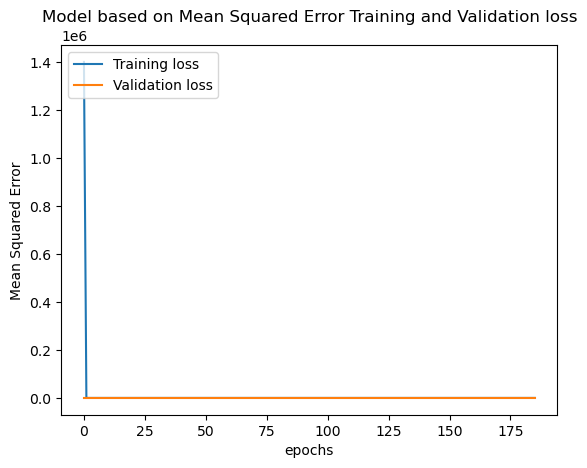

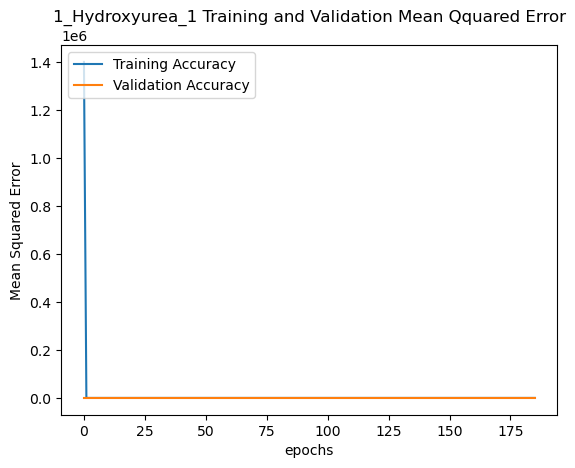

In [21]:
pheno_name='1_Hydroxyurea_1'
evaluateModel_loss(history_mse,'Model based on Mean Squared Error','loss','val_loss')
evaluateModel_metric(history_mse,pheno_name,'mse','val_mse')

In [24]:
evaluate_data = model_mse.evaluate(
    x_test, y_test[:,6], verbose=1, batch_size=32)
#print(evaluate_data)

# predict
predict_data = model_mse.predict(x_test)

33/33 [==============================] - 0s 10ms/step


In [23]:
#saving the model
model_mse.save('saved Models/1_Hydroxyurea_1.h5')